# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "allergy" in their title or abstract. You can download that dataset in the form of four files (`allergy_Summaries.pkl.bz2`, etc.) from Canvas. Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file.

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/allergy_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[22538601]

paper(title='Forum: Immunology: Allergy challenged.', authors=['Artis D', 'Maizels RM', 'Finkelman FD'], year=2012, doi='10.1038/484458a')

In [5]:
Summaries[22538601].title

'Forum: Immunology: Allergy challenged.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy

In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2011, 2276), (2012, 2244), (2013, 2458), (2014, 2769), (2015, 2796), (2016, 2965), (2017, 3068), (2018, 3114), (2019, 3005), (2020, 4)]


Filtering results, to obain only papers since 1940:

In [9]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
73646


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

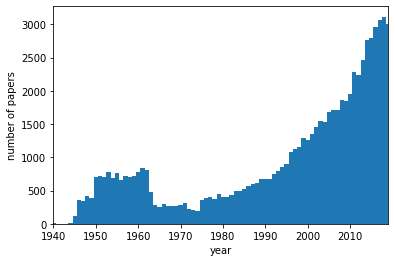

In [10]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2019)
plt.xlabel('year')
plt.ylabel('number of papers');

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

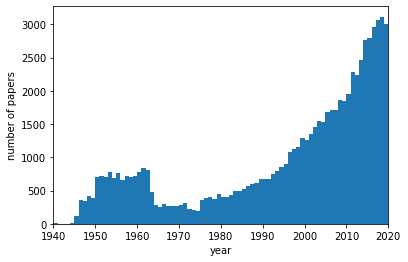

In [11]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2021) );
plt.xlim(1940, 2020)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [12]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( flat_author_list )

In [13]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
137755


In [14]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Valenta R', 335), ('Sampson HA', 313), ('Bousquet J', 270), ('Bruze M', 259), ('Canonica GW', 248), ('Johansen JD', 240), ('Passalacqua G', 232), ('Demoly P', 231), ('Menné T', 219), ('Ring J', 208), ('Wahn U', 193), ('Burks AW', 185), ('Sicherer SH', 181), ('Vieths S', 181), ('Moneret-Vautrin DA', 181), ('Niggemann B', 167), ('Wüthrich B', 162), ('Sheikh A', 161), ('van Ree R', 158), ('Andersen KE', 158), ('Beyer K', 157), ('Asero R', 157), ('Akdis CA', 155), ('Allen KJ', 154), ('Bindslev-Jensen C', 154), ('Muraro A', 152), ('Ciprandi G', 152), ('Incorvaia C', 151), ('Fiocchi A', 149), ('Roberts G', 146), ('Kraft D', 146), ('Ebisawa M', 145), ('Wood RA', 144), ('Uter W', 140), ('Wang J', 137), ('Ebner C', 137), ('Haahtela T', 132), ('Thyssen JP', 132), ('Björkstén B', 129), ('Papadopoulos NG', 128), ('Zuberbier T', 128), ('Lack G', 128), ('Zhang Y', 127), ('Knulst AC', 126), ('Wickman M', 124), ('Warner JO', 122), ('Kimber I', 120), ('

Then we can create a histogram to visualize the results:

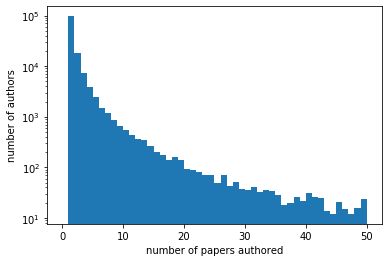

In [15]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(51), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

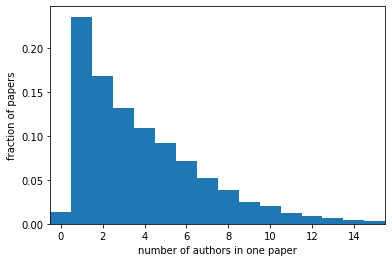

In [16]:
plt.hist(x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True)
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [17]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
63474


----------

# Tasks

**Your name:** Andrew Harrison

### Task 1

Create a Python dictionary object that returns sets of author names for a given year. Name this dictionary `authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the author set for the year 1935.

In [18]:
authors_at_year = defaultdict(set)
for paper in Summaries.values():
    for author in paper.authors:
        authors_at_year[paper.year].add(author)
print(authors_at_year[1935])

{'Cooke RA', 'Jay HM', 'Martin EG', 'Stull A', 'Hebald S', 'Barnard JH'}


### Task 2

Based on the dictionary `authors_at_year` from exercise 1 above, create a plot for the years from 1940 until now that shows how many authors published at least one paper in the given particular year. (You can retrieve the number of unique items in a set `s` with `len(s)`.)

Text(0, 0.5, 'number of authors publishing >=1 paper')

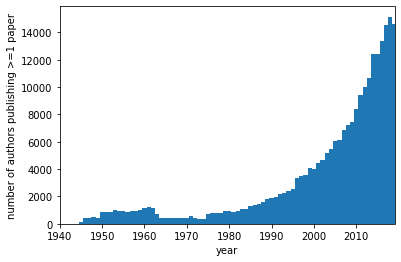

In [19]:
nr_authors_per_year_since_1940 = []
for year in years_since_1940:
#     print(year, len(authors_at_year[year]))
    nr_authors_per_year_since_1940.append(len(authors_at_year[year]))
# print(nr_authors_per_year_since_1940)

plt.bar(x=years_since_1940, height=nr_authors_per_year_since_1940, width=1.0)
plt.xlim(1940, 2019)
plt.xlabel('year')
plt.ylabel('number of authors publishing >=1 paper')

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency (in descending order with respect to the frequency). Use the data structures created above (in the sections before the tasks).

In [20]:
most_frequent_10 = word_counts.most_common(10)
for word in most_frequent_10: print(word[0],":",word[1])

of : 52379
in : 38590
and : 35612
the : 26613
allergy : 16954
to : 15350
a : 15314
with : 12125
allergic : 8569
for : 8192


### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent. (For readability, don't show the actual words.) Make again use of the data structures created above.

Text(0, 0.5, 'number of times used')

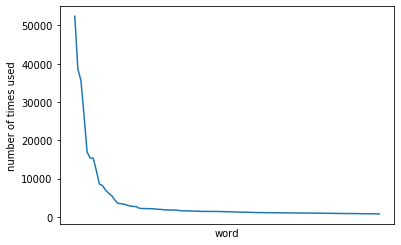

In [21]:
most_frequent_100 = word_counts.most_common(100)
most_frequent_word = []
most_frequent_count = []
for most in most_frequent_100:
    most_frequent_word.append(most[0])
    most_frequent_count.append(most[1])

plt.plot(most_frequent_word, most_frequent_count)
# plt.bar(x=most_frequent_word, height=most_frequent_count, width=1.0)
plt.xlabel('word')
plt.xticks([])
plt.ylabel('number of times used')

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain all types of words we find in this top-10 and why.

**Answer:** [Eight of the words: 'of, in, and, the, to, a, with, for' are stop words. Words that will take up memory, and computation cycles, but don't add anything to your search (or to NLP in machine learning, for example, NLTK lists all of these as standard english stop words). You should thus remove these words from your indexing efforts. The other two words 'allergy, allergic' are expected, as this dataset is a subset of pubmed publications containing the word "allergy" in their title or abstract. Allergic being simply the adjective of the noun allergy, and would inherently be highly likely to be used. You could use word stemming to further reduce space used i.e. just using allergy]

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done individually and group submissions are **not allowed**.